# Experiment 1 : Grow of stables attractors fields in Aleatory CBN

This experiment explore the growth of local networks in CBN with Linear topology. Its important see what happened with the Linear CBN with more local networks

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
# df = pd.read_csv("outputs/exp2_data_6_10/data.csv")
df = pd.read_csv("outputs/exp2_data_7_500/data.csv")
df.keys()

Index(['i_sample', 'n_local_networks', 'n_var_network', 'v_topology',
       'n_output_variables', 'n_clauses_function', 'n_edges', 'step', 'method',
       'execution_time', 'n_local_attractors', 'n_pair_attractors',
       'n_attractor_fields'],
      dtype='object')

In [14]:
df

,i_sample,n_local_networks,n_var_network,v_topology,n_output_variables,n_clauses_function,n_edges,step,method,execution_time,n_local_attractors,n_pair_attractors,n_attractor_fields
0,1,7,5,2,2,2,7,1,1,0.468481,16.0,NaN,NaN
1,1,7,5,2,2,2,7,1,2,0.227937,16.0,NaN,NaN
2,1,7,5,2,2,2,7,1,3,0.226104,16.0,NaN,NaN
3,1,7,5,2,2,2,7,2,1,0.000341,NaN,20.0,NaN
4,1,7,5,2,2,2,7,2,2,0.104469,NaN,20.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2938,55,7,7,2,2,2,7,2,2,0.301224,NaN,22.0,NaN
2939,55,7,7,2,2,2,7,2,3,0.290154,NaN,22.0,NaN
2940,55,7,7,2,2,2,7,3,1,0.000519,NaN,NaN,2.0
2941,55,7,7,2,2,2,7,3,2,1.539690,NaN,NaN,2.0


## General Statistics

### Statistics

In [11]:
# Compute mean execution times grouped by method, step, and number of n_var_network
mean_times = df.groupby(['step', 'method', 'n_var_network'])['execution_time'].mean().reset_index()

# Sort the values before pivoting
mean_times = mean_times.sort_values(by=['step', 'method'])

# Pivot the table to have columns for each n_var_network
table = mean_times.pivot(index=['step', 'method'], columns='n_var_network', values='execution_time')

# Print the table
table

n_var_network        5         6         7           8         9           10
step method                                                                  
1    1         0.523606  0.659357  0.690781    0.915273  1.043660    1.387310
     2         0.700971  0.731595  0.708423    0.762774  0.900156    0.928841
     3         0.704618  0.744882  0.707983    0.775114  0.890823    0.908147
2    1         0.000449  0.000506  0.000461    0.000584  0.000578    0.000651
     2         0.559650  0.565188  0.539641    0.528111  0.609686    0.532147
     3         0.561366  0.566584  0.528765    0.518114  0.605766    0.534801
3    1         1.797587  7.245499  0.160870  193.285026  5.810075  269.123221
     2         3.719332  5.882715  2.664245   81.670376  5.740697  110.465845
     3         3.738632  5.803013  2.607940   83.693466  5.571080  111.507672

### Boxplots and Violin Plots

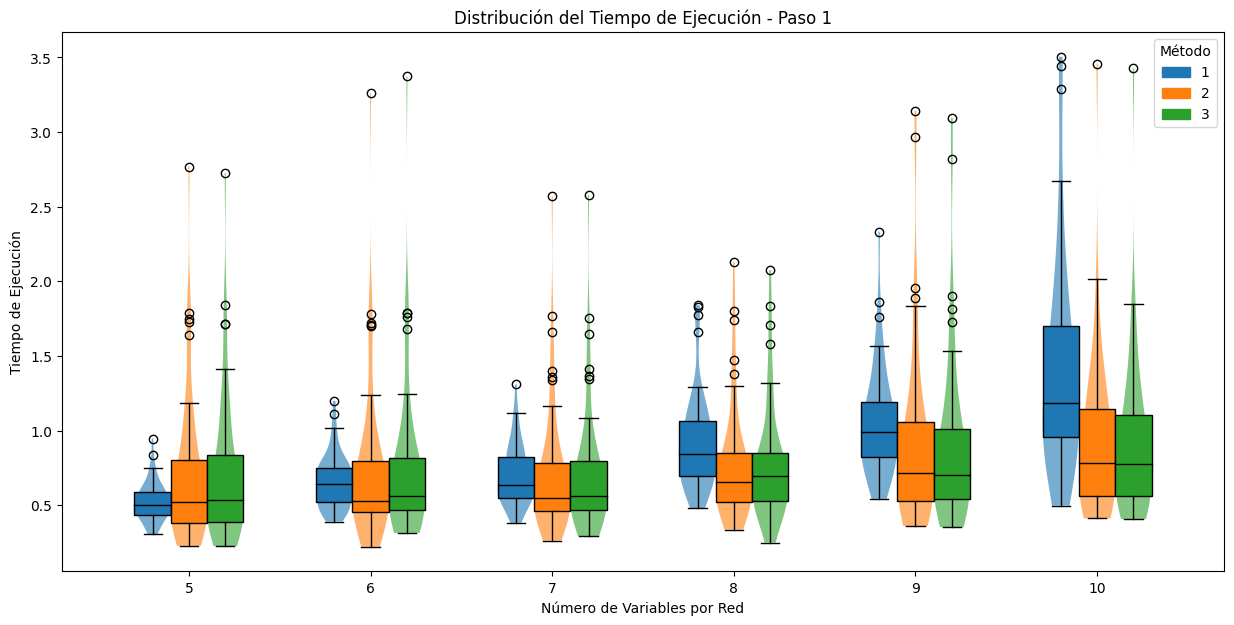

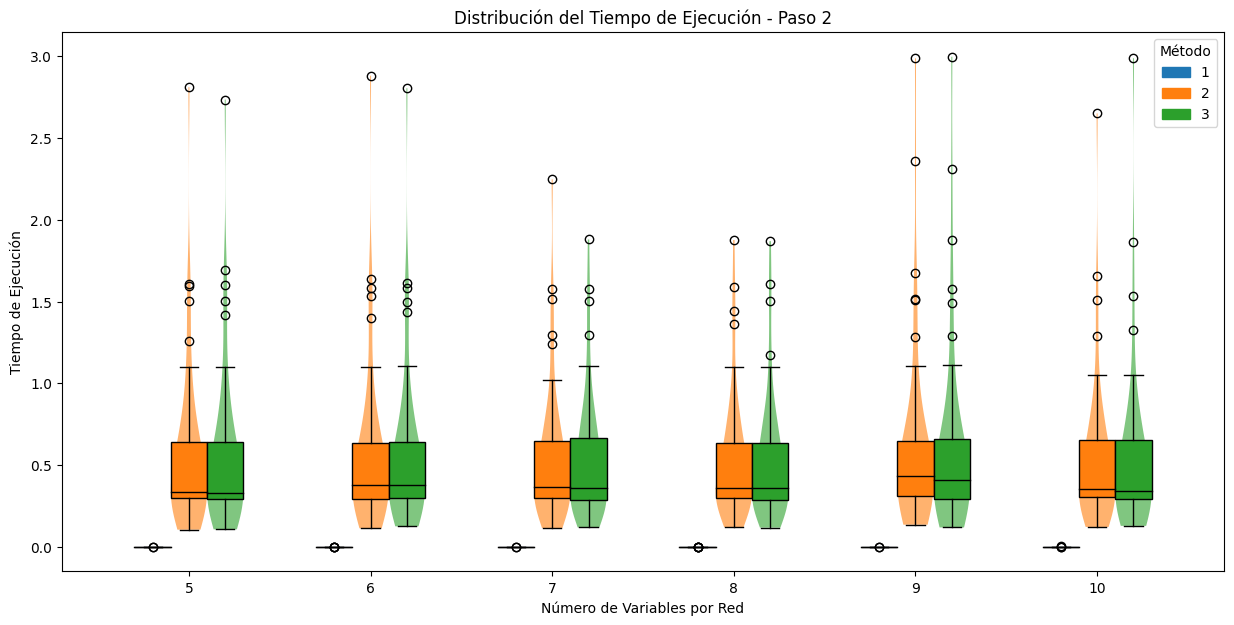

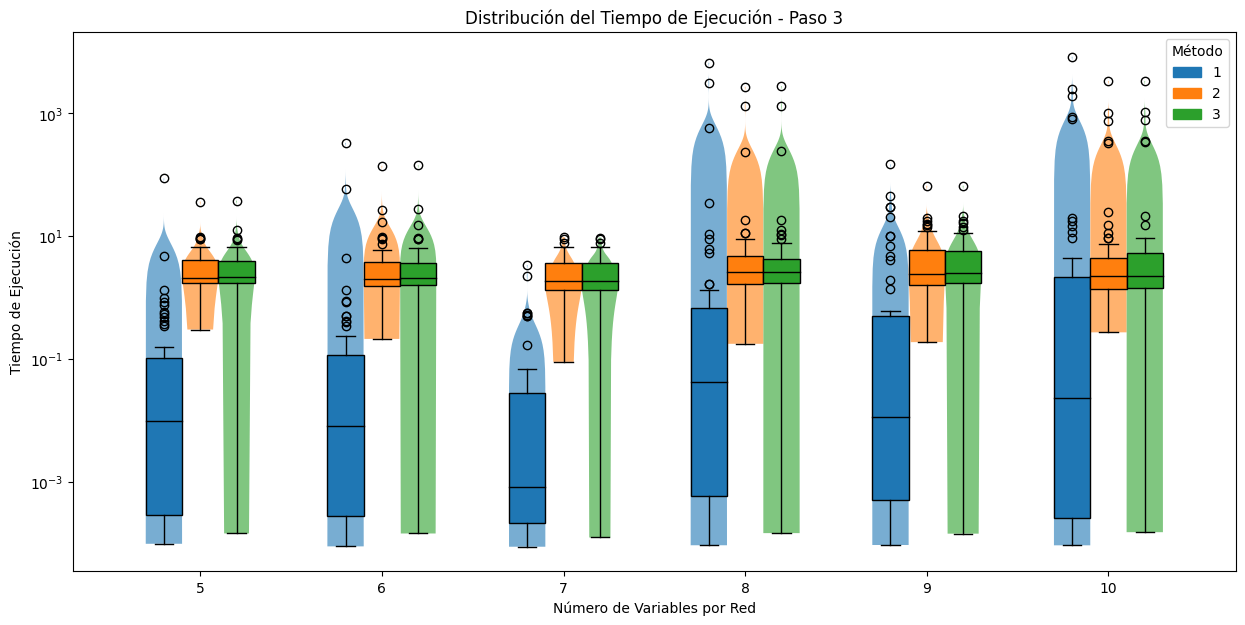

In [12]:
# Unique values for steps, methods y n_var_network
steps = sorted(df['step'].unique())
methods = df['method'].unique()
n_var_network_values = sorted(df['n_var_network'].unique())

# Plot boxplots and violin plots por número de variables
for step in steps:
    fig, ax = plt.subplots(figsize=(15, 7))
    positions = np.arange(len(n_var_network_values))  # Posiciones en el eje X
    width = 0.2  # Ancho para cada caja/violin

    # Dibujar boxplots para cada método
    for i, method in enumerate(methods):
        data = [df[(df['step'] == step) & (df['method'] == method) & (df['n_var_network'] == n)]
                ['execution_time'].dropna() for n in n_var_network_values]
        ax.boxplot(
            data,
            positions=positions + i * width - width,
            widths=width,
            patch_artist=True,
            boxprops=dict(facecolor=f"C{i}"),
            medianprops=dict(color='black')
        )

    # Dibujar violin plots para cada método
    for i, method in enumerate(methods):
        data = [df[(df['step'] == step) & (df['method'] == method) & (df['n_var_network'] == n)]
                ['execution_time'].dropna().values for n in n_var_network_values]
        parts = ax.violinplot(
            data,
            positions=positions + i * width - width,
            widths=width,
            showmeans=False,
            showextrema=False,
            showmedians=False
        )
        for pc in parts['bodies']:
            pc.set_facecolor(f"C{i}")
            pc.set_alpha(0.6)

    ax.set_xticks(positions)
    ax.set_xticklabels(n_var_network_values)
    ax.set_xlabel("Número de Variables por Red")
    ax.set_ylabel("Tiempo de Ejecución")
    ax.set_title(f"Distribución del Tiempo de Ejecución - Paso {step}")
    ax.legend(
        [plt.Rectangle((0, 0), 1, 1, color=f"C{i}") for i in range(len(methods))],
        methods,
        title="Método"
    )

    # Para el paso 3, usar escala logarítmica en el eje y
    if step == 3:
        ax.set_yscale('log')

    plt.show()

### Histograms

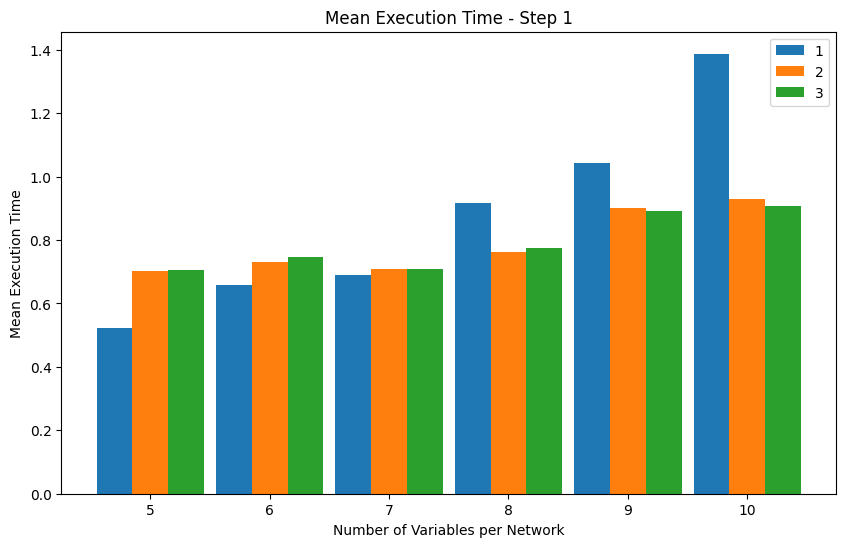

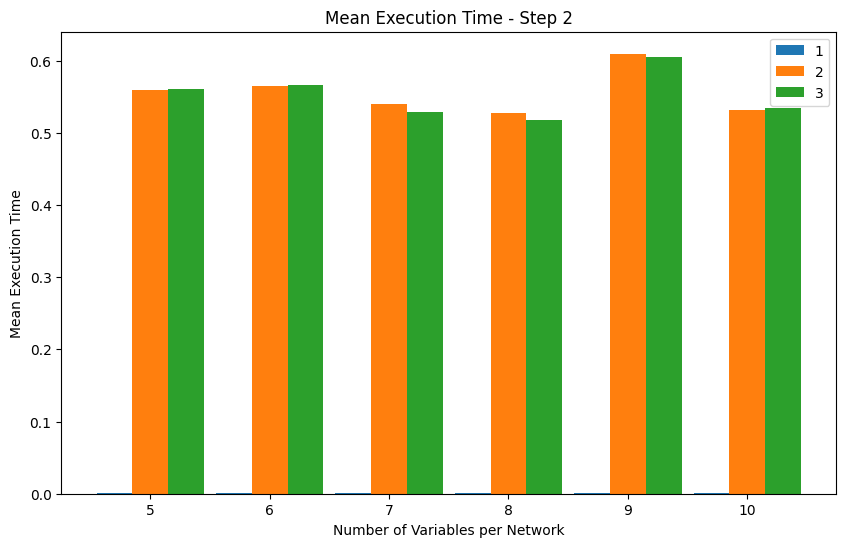

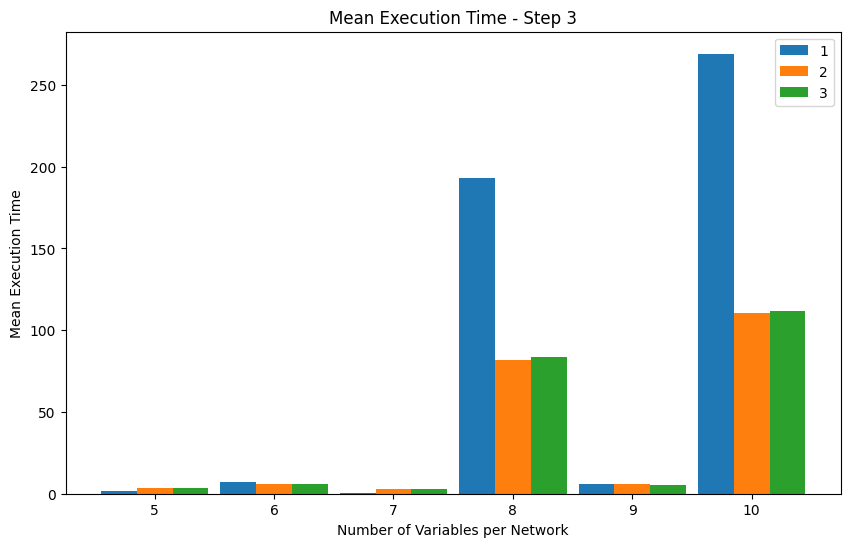

In [13]:
# Valores únicos para pasos, métodos y número de variables por red
unique_steps = df['step'].unique()
unique_methods = df['method'].unique()
unique_n_var_networks = sorted(df['n_var_network'].unique())

# Crear histogramas de tiempos medios de ejecución para cada paso
for step in unique_steps:
    fig, ax = plt.subplots(figsize=(10, 6))
    data_step = mean_times[mean_times['step'] == step]

    width = 0.3  # Ancho de cada barra
    positions = np.arange(len(unique_n_var_networks))

    for i, method in enumerate(unique_methods):
        means = [
            data_step[(data_step['n_var_network'] == n) & (data_step['method'] == method)]['execution_time'].values[0]
            if not data_step[(data_step['n_var_network'] == n) & (data_step['method'] == method)].empty else 0
            for n in unique_n_var_networks
        ]
        ax.bar(positions + i * width, means, width=width, label=method, color=f"C{i}")

    ax.set_xticks(positions + width)
    ax.set_xticklabels(unique_n_var_networks)
    ax.set_xlabel("Number of Variables per Network")
    ax.set_ylabel("Mean Execution Time")
    ax.set_title(f"Mean Execution Time - Step {step}")
    ax.legend()
    plt.show()
